<a href="https://colab.research.google.com/github/zahraa-m/PHE_UK/blob/Mizue/PHE_Mizue_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Explore the factors for change in the cost of drugs between 2020 and 2021
*   Looking at the drug group by BNF_CHAPTER_PLUS_CODE
*   Focusing on the drug group 14


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

df_2020= pd.read_csv('https://raw.githubusercontent.com/zahraa-m/PHE_UK/main/EPD_202004.csv')
df_2021= pd.read_csv('https://raw.githubusercontent.com/zahraa-m/PHE_UK/main/EPD_202104.csv')


In [ ]:
#Check the number and top of Area code in 2020
df_2020['area_co'] = df_2020['POSTCODE'].str[0:3]
df_2020['area_co'].describe()

count     215625
unique        21
top          M9 
freq       20797
Name: area_co, dtype: object

In [ ]:
#Check the number and top of Area code in 2021
df_2021['area_co'] = df_2021['POSTCODE'].str[0:3]
df_2021['area_co'].describe()

count     221099
unique        24
top          M22
freq       21131
Name: area_co, dtype: object

In [ ]:
#prescriptions by area code in 2021 #need improve!
area_code_data = pd.Series([215625,  21, 'M9', 20797], index=['count','unique','top', 'freq'])
area_code_data

count     215625
unique        21
top           M9
freq       20797
dtype: object

In [ ]:
# sum of 'ACTUAL_COST' in 3 Primary Care Organisation (PCOs) [2020 & 2021]
df_2020['ACTUAL_COST'].sum()
df_2021['ACTUAL_COST'].sum()

# increment of 'ACTUAL_COST' in 3 PCOs from 2020 to 2021
df_2021['ACTUAL_COST'].sum()/df_2020['ACTUAL_COST'].sum()

1.035649332444932

In [ ]:
#summarise the group of 'BNF_CHAPTER_PLUS_CODE' in 2020
df_2020['BNF_CHAPTER_PLUS_CODE'].describe()

count                         216319
unique                            20
top       04: Central Nervous System
freq                           54743
Name: BNF_CHAPTER_PLUS_CODE, dtype: object

In [ ]:
#summarise the group of 'BNF_CHAPTER_PLUS_CODE' in 2021
df_2021['BNF_CHAPTER_PLUS_CODE'].describe()

count                         221428
unique                            21
top       04: Central Nervous System
freq                           56409
Name: BNF_CHAPTER_PLUS_CODE, dtype: object

In [ ]:
#summarise the group of 'CHEMICAL_SUBSTANCE_BNF_DESC' in 2020
df_2020['CHEMICAL_SUBSTANCE_BNF_DESCR'].describe()

count             216319
unique              1042
top       Colecalciferol
freq                3598
Name: CHEMICAL_SUBSTANCE_BNF_DESCR, dtype: object

In [ ]:
#summarise the group of 'CHEMICAL_SUBSTANCE_BNF_DESC' in 2021
df_2021['CHEMICAL_SUBSTANCE_BNF_DESCR'].describe()

count             221428
unique              1031
top       Colecalciferol
freq                3970
Name: CHEMICAL_SUBSTANCE_BNF_DESCR, dtype: object

In [ ]:
# prescribed_drug(by the name of main active ingredient) Top 30 in 2020
drug_count_2020 = df_2020['CHEMICAL_SUBSTANCE_BNF_DESCR'] .value_counts()
drug_count_2020.head(30)

Colecalciferol                                3598
Co-codamol (Codeine phosphate/paracetamol)    3383
Other Appliances                              3213
Emollients                                    3000
Enteral nutrition                             2957
Metformin hydrochloride                       2488
Wound Management & Other Dressings            2333
Paracetamol                                   2245
Pregabalin                                    2233
Gabapentin                                    2025
Quetiapine                                    2016
Eye Products                                  1979
Other emollient preparations                  1970
Hydrocortisone                                1936
Beclometasone dipropionate                    1884
Ramipril                                      1879
Glucose blood testing reagents                1871
Venlafaxine                                   1864
Morphine sulfate                              1809
Macrogol 3350                  

In [ ]:
# prescribed_drug(by the name of main active ingredient) Top 30 in 2021
drug_count_2021 = df_2021['CHEMICAL_SUBSTANCE_BNF_DESCR'] .value_counts()
drug_count_2021.head(30)

Colecalciferol                                3970
Co-codamol (Codeine phosphate/paracetamol)    3568
Other Appliances                              3493
Emollients                                    3265
Enteral nutrition                             3018
Metformin hydrochloride                       2616
Pregabalin                                    2472
Wound Management & Other Dressings            2296
Quetiapine                                    2212
Eye Products                                  2171
Gabapentin                                    2132
Paracetamol                                   2096
Hydrocortisone                                2062
Other emollient preparations                  2015
Venlafaxine                                   1978
Glucose blood testing reagents                1936
Ramipril                                      1867
Macrogol 3350                                 1840
Levothyroxine sodium                          1781
Morphine sulfate               

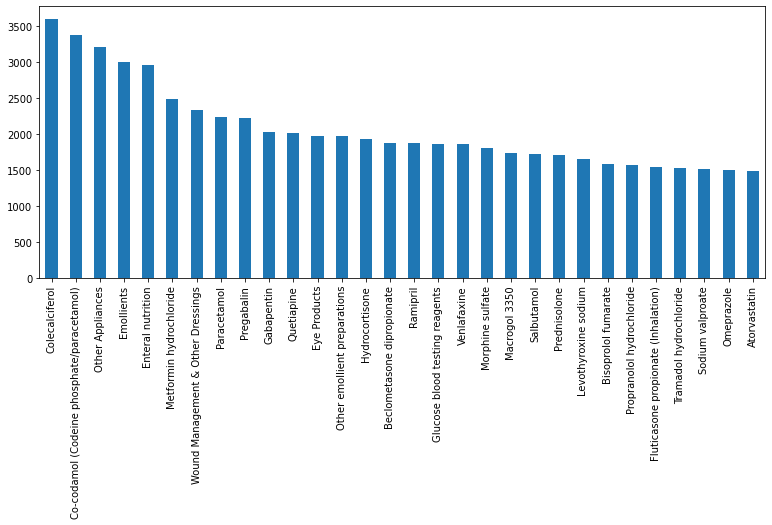

In [ ]:
# Individual bar chart of prescribed_drug Top 30 in 2020
drug_2020_top30 = drug_count_2020.head(30)
drug_2020_top30.plot.bar(figsize=(13,5))

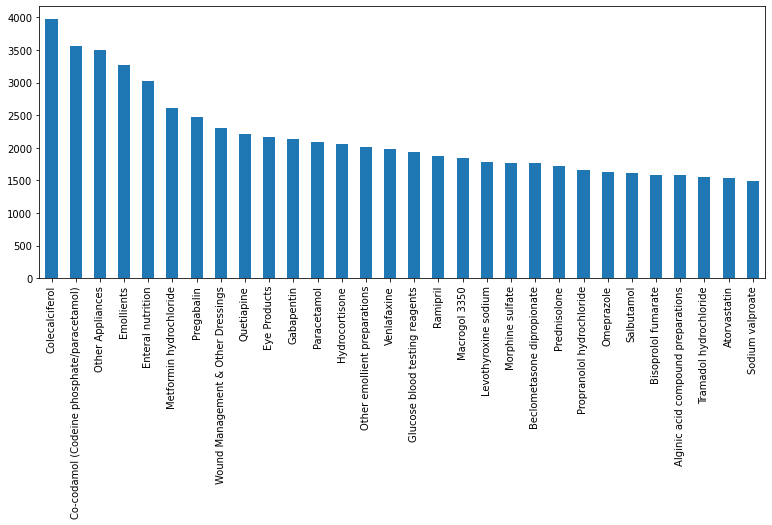

In [ ]:
 # Individual bar chart of prescribed_drug Top 30 in 2021
drug_2021_top30 = drug_count_2021.head(30)
drug_2021_top30.plot.bar(figsize=(13,5))

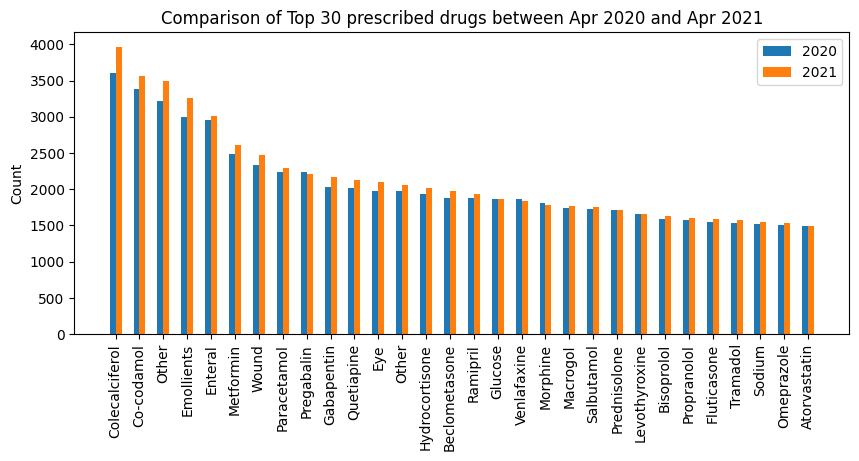

In [ ]:
# Comparison of Top 30 prescribed drugs between Apr 2020 and Apr 2021
x = np.arange(len(drug_2020_top30.keys()))
width = 0.25

_ , ax = plt.subplots()
rects1 = ax.bar(x - width/2, drug_2020_top30, width, label='2020')
rects2 = ax.bar(x + width/2, drug_2021_top30, width, label='2021')

ax.set_ylabel('Count')
ax.set_title('Comparison of Top 30 prescribed drugs between Apr 2020 and Apr 2021')
ax.set_xticks(x)

first_word = pd.Series(drug_2020_top30.keys().tolist())
first = first_word.str.split(' ').str[0]

ax.set_xticklabels(first, rotation=90)

ax.legend()

fig = plt.gcf()
fig.set_size_inches(10,4, forward =True)
fig.set_dpi(100)

In [ ]:
# count prescribed drugs by group( 'BNF_CHAPTER_PLUS_CODE' ) in 2020
drug_count_byGroup_2020 = df_2020[['BNF_CHAPTER_PLUS_CODE', 'QUANTITY']] .value_counts()
drug_count_byGroup_2020.describe()

count     2019.000000
mean       107.141654
std        510.512746
min          1.000000
25%          1.000000
50%          5.000000
75%         35.000000
max      10582.000000
dtype: float64

In [ ]:
# sum(K) of 'ACTUAL_COST' grouped by 'BNF_CHAPTER_PLUS_CODE'  [2020]
df_2020.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()/1000

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                                468.508071
02: Cardiovascular System                                   914.784524
03: Respiratory System                                      968.189143
04: Central Nervous System                                 1519.091111
05: Infections                                              181.082084
06: Endocrine System                                       1313.136027
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     194.625380
08: Malignant Disease and Immunosuppression                  94.722777
09: Nutrition and Blood                                     724.794658
10: Musculoskeletal and Joint Diseases                      137.940178
11: Eye                                                     116.891564
12: Ear, Nose and Oropharynx                                 80.768769
13: Skin                                                    305.498601
14: Immunological Products and Vaccines                

In [ ]:
# sum(K) of 'ACTUAL_COST' grouped by 'BNF_CHAPTER_PLUS_CODE'  [2021]
df_2021.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()/1000

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                                544.279861
02: Cardiovascular System                                  1016.091803
03: Respiratory System                                      934.475671
04: Central Nervous System                                 1463.184325
05: Infections                                              173.144707
06: Endocrine System                                       1385.890353
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     199.773825
08: Malignant Disease and Immunosuppression                 100.457815
09: Nutrition and Blood                                     740.701600
10: Musculoskeletal and Joint Diseases                      144.268225
11: Eye                                                     112.416135
12: Ear, Nose and Oropharynx                                 80.327344
13: Skin                                                    335.465074
14: Immunological Products and Vaccines                

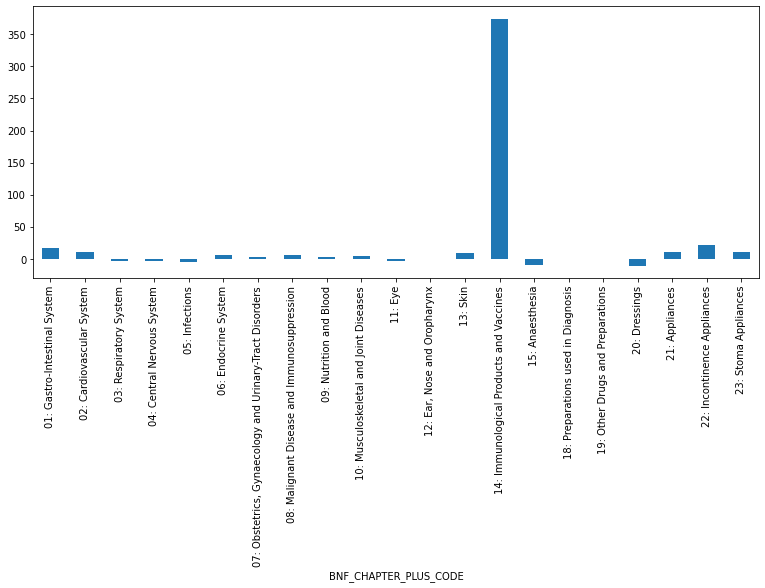

In [ ]:
# Calculating percentage increase of 'ACTUAL_COST' grouped by 'BNF_CHAPTER_PLUS_CODE' from Apr 2020 to Apr 2021
AC_sum_2021 =df_2021.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()
AC_sum_2020 =df_2020.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()

percentage_increase =  (AC_sum_2021 - AC_sum_2020)/AC_sum_2020*100
percentage_increase.plot.bar(figsize=(13,5))

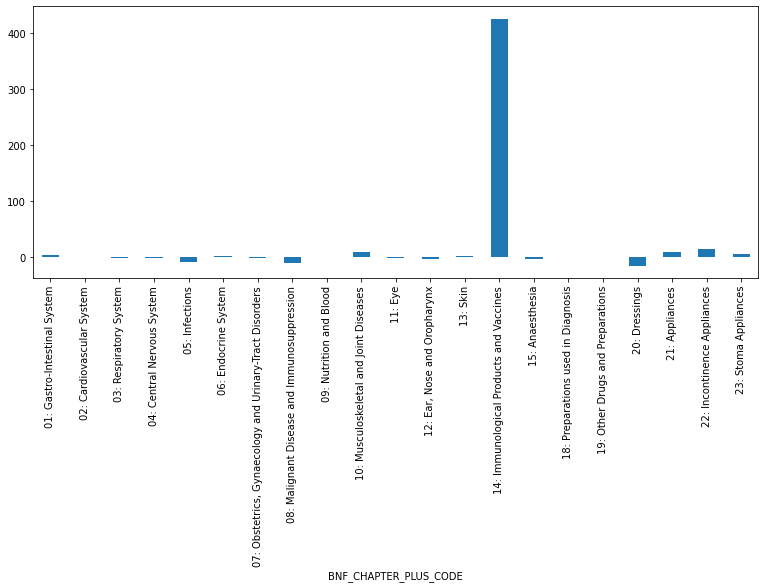

In [ ]:
# Calculating percentage increase of 'TOTAL_QUANTITY' grouped by 'BNF_CHAPTER_PLUS_CODE' from Apr 2020 to Apr 2021
TQ_sum_2021 =df_2021.groupby('BNF_CHAPTER_PLUS_CODE')['TOTAL_QUANTITY'].sum()
TQ_sum_2020 =df_2020.groupby('BNF_CHAPTER_PLUS_CODE')['TOTAL_QUANTITY'].sum()

percentage_increase =  (TQ_sum_2021 - TQ_sum_2020)/TQ_sum_2020*100
percentage_increase.plot.bar(figsize=(13,5))

In [ ]:
#proprtion(%) of ACT(kGBP) in each group in 2020
prop_AC_sum_2020 = df_2020.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()/df_2020['ACTUAL_COST'].sum()*100
prop_AC_sum_2020 

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                                5.968595
02: Cardiovascular System                                  11.653969
03: Respiratory System                                     12.334322
04: Central Nervous System                                 19.352581
05: Infections                                              2.306909
06: Endocrine System                                       16.728800
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     2.479445
08: Malignant Disease and Immunosuppression                 1.206728
09: Nutrition and Blood                                     9.233579
10: Musculoskeletal and Joint Diseases                      1.757300
11: Eye                                                     1.489149
12: Ear, Nose and Oropharynx                                1.028960
13: Skin                                                    3.891923
14: Immunological Products and Vaccines                     0.091072
15: Anaesthe

In [ ]:
#proprtion(%) of ACT(kGBP) in each group in 2021
prop_AC_sum_2021 = df_2021.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()/df_2021['ACTUAL_COST'].sum()*100
prop_AC_sum_2021

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                                6.695216
02: Cardiovascular System                                  12.499000
03: Respiratory System                                     11.495036
04: Central Nervous System                                 17.998710
05: Infections                                              2.129862
06: Endocrine System                                       17.047912
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     2.457429
08: Malignant Disease and Immunosuppression                 1.235737
09: Nutrition and Blood                                     9.111411
10: Musculoskeletal and Joint Diseases                      1.774651
11: Eye                                                     1.382837
12: Ear, Nose and Oropharynx                                0.988111
13: Skin                                                    4.126574
14: Immunological Products and Vaccines                     0.416944
15: Anaesthe

In [ ]:
# [2020] list of the drugs('CHEMICAL_SUBSTANCE_BNF_DESCR') and 'ACTUAL_COST' in "BNF_CHAPTER_PLUS_CODE:14" (groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'])
drugs_14_2020 = df_2020.loc[df_2020['BNF_CHAPTER_PLUS_CODE'] == '14: Immunological Products and Vaccines']
drugs_14_AC_2020 = drugs_14_2020[['CHEMICAL_SUBSTANCE_BNF_DESCR', 'ACTUAL_COST']]
drugs_14_AC_2020

,CHEMICAL_SUBSTANCE_BNF_DESCR,ACTUAL_COST
8517,Hepatitis B,48.31035
10780,Pneumococcal,15.46824
11095,Pneumococcal,31.23394
11817,Influenza,44.61991
13620,"Measles, mumps and rubella vaccine",7.12680
...,...,...
210244,Diphtheria,7.25074
212321,Pneumococcal,15.61697
212994,Hepatitis B,35.41706
214666,Diphtheria,7.25074


In [ ]:
# [2021] list of the  drugs('CHEMICAL_SUBSTANCE_BNF_DESCR') and 'ACTUAL_COST' in "BNF_CHAPTER_PLUS_CODE:14" (groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'])
drugs_14_2021 = df_2021.loc[df_2021['BNF_CHAPTER_PLUS_CODE'] == '14: Immunological Products and Vaccines']
drugs_14_AC_2021 = drugs_14_2021[['CHEMICAL_SUBSTANCE_BNF_DESCR', 'ACTUAL_COST']]
drugs_14_AC_2021

,CHEMICAL_SUBSTANCE_BNF_DESCR,ACTUAL_COST
794,Diphtheria,7.27746
5563,Influenza,2917.94447
6973,Influenza,1341.24108
8364,Diphtheria,7.26506
9799,Hepatitis B,24.19822
...,...,...
217015,Typhoid,10.39462
217184,Hepatitis B,24.19822
217742,Hepatitis A,41.25248
217753,Influenza,27.77487


In [ ]:
# (grouped by name)list of the drugs('CHEMICAL_SUBSTANCE_BNF_DESCR') and 'ACTUAL_COST' in "BNF_CHAPTER_PLUS_CODE:14" (groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'])

drugs_14_AC_2020_sum = drugs_14_2020.groupby(['CHEMICAL_SUBSTANCE_BNF_DESCR']).sum()
drugs_14_AC_2020_sum

,YEAR_MONTH,QUANTITY,ITEMS,TOTAL_QUANTITY,ADQUSAGE,NIC,ACTUAL_COST,UNIDENTIFIED
CHEMICAL_SUBSTANCE_BNF_DESCR,,,,,,,,
Diphtheria,3434068,17.0,34,34.0,0.0,280.14,260.43781,0
Hepatitis A,2626052,13.0,67,67.0,0.0,1353.36,1258.05847,0
Hepatitis A/hepatitis B,202004,1.0,2,2.0,0.0,41.58,38.65200,0
Hepatitis A/typhoid vaccine,1212024,6.0,25,25.0,0.0,894.00,831.04589,0
Hepatitis B,6666132,34.0,56,57.0,0.0,735.85,684.06972,0
Influenza,3636072,18.0,210,210.0,0.0,1827.55,1698.85673,0
"Measles, mumps and rubella vaccine",202004,1.0,1,1.0,0.0,7.64,7.12680,0
Meningococcal A + C + W135 + Y vaccine,202004,1.0,1,1.0,0.0,30.00,27.88745,0
Pneumococcal,6868136,34.0,195,195.0,0.0,1783.52,1657.93970,0


In [ ]:
# (grouped by name)list of the drugs('CHEMICAL_SUBSTANCE_BNF_DESCR') and 'ACTUAL_COST' in "BNF_CHAPTER_PLUS_CODE:14" (groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'])

drugs_14_AC_2021_sum = drugs_14_2021.groupby(['CHEMICAL_SUBSTANCE_BNF_DESCR']).sum()
drugs_14_AC_2021_sum

,YEAR_MONTH,QUANTITY,ITEMS,TOTAL_QUANTITY,ADQUSAGE,NIC,ACTUAL_COST,UNIDENTIFIED
CHEMICAL_SUBSTANCE_BNF_DESCR,,,,,,,,
Diphtheria,2223144,11.0,15,15.0,0.0,117.00,108.98827,0
Hepatitis A,2223144,11.0,16,16.0,0.0,335.57,312.55575,0
Hepatitis A/hepatitis B,404208,2.0,7,7.0,0.0,233.19,217.19723,0
Hepatitis A/typhoid vaccine,202104,1.0,2,2.0,0.0,71.52,66.61497,0
Hepatitis B,7275744,37.0,119,121.0,0.0,1500.14,1397.28130,0
"Human papillomavirus (Type 6,11,16,18)",404208,2.0,11,11.0,0.0,951.50,886.24367,0
Influenza,3839976,19.0,3090,3090.0,0.0,29951.28,27897.14378,0
Meningococcal A + C + W135 + Y vaccine,404208,2.0,4,4.0,0.0,120.00,111.77009,0
Pneumococcal,7679952,38.0,181,181.0,0.0,2582.88,2405.75182,0
